<a href="https://colab.research.google.com/github/XavierCarrera/text-classification-system/blob/main/Document_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pachocamacho1990/datasets

In [ ]:
import pandas as pd
import numpy as np
import nltk, random
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize

In [3]:
df = pd.read_csv('datasets/email/csv/spam-apache.csv', names = ['clase','contenido'])
df['tokens'] = df['contenido'].apply(lambda x: word_tokenize(x))
df.head()

,clase,contenido,tokens
0,-1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...","[<, !, DOCTYPE, HTML, PUBLIC, ``, -//W3C//DTD,..."
1,1,> Russell Turpin:\n> > That depends on how the...,"[>, Russell, Turpin, :, >, >, That, depends, o..."
2,-1,Help wanted. We are a 14 year old fortune 500...,"[Help, wanted, ., We, are, a, 14, year, old, f..."
3,-1,Request A Free No Obligation Consultation!\nAc...,"[Request, A, Free, No, Obligation, Consultatio..."
4,1,Is there a way to look for a particular file o...,"[Is, there, a, way, to, look, for, a, particul..."


In [4]:
df_spam = df[df["clase"] == -1]
df_spam.head()

,clase,contenido,tokens
0,-1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...","[<, !, DOCTYPE, HTML, PUBLIC, ``, -//W3C//DTD,..."
2,-1,Help wanted. We are a 14 year old fortune 500...,"[Help, wanted, ., We, are, a, 14, year, old, f..."
3,-1,Request A Free No Obligation Consultation!\nAc...,"[Request, A, Free, No, Obligation, Consultatio..."
10,-1,>\n>“µ×è¹µÑÇ ¡ÑºâÅ¡¸ØÃ¡Ô¨º¹ÍÔ¹àµÍÃìà¹çµ” \n>àµ...,"[>, >, “, µ×è¹µÑÇ, ¡ÑºâÅ¡¸ØÃ¡Ô¨º¹ÍÔ¹àµÍÃìà¹çµ,..."
11,-1,==============================================...,[=============================================...


In [6]:
spam_words = nltk.FreqDist([w for tokenlist in df_spam['tokens'].values for w in tokenlist])
top_spam_words = spam_words.most_common(200)
top_spam_words[:20]

[('.', 1256),
 ('--', 1099),
 ('the', 1019),
 (',', 978),
 ('to', 842),
 ('>', 759),
 (':', 686),
 ('<', 675),
 ('%', 667),
 ('!', 652),
 ('and', 642),
 ('you', 569),
 ('of', 503),
 ('#', 499),
 ('BR', 494),
 ('in', 382),
 ('a', 368),
 ('$', 368),
 ('for', 358),
 ('I', 316)]

In [7]:
all_words = nltk.FreqDist([w for tokenlist in df['tokens'].values for w in tokenlist])
top_words = all_words.most_common(200)
top_words[:20]

[('.', 2200),
 (',', 2173),
 ('the', 1963),
 ('>', 1787),
 ('--', 1611),
 ('to', 1435),
 (':', 1220),
 ('and', 1064),
 ('of', 958),
 ('a', 879),
 ('you', 743),
 ('in', 742),
 ('I', 741),
 ('<', 718),
 ('!', 698),
 ('%', 677),
 ('for', 609),
 ('is', 577),
 ('#', 521),
 ('BR', 494)]

In [8]:
spam_words_list = [w for (w, c) in top_spam_words]
top_words_list = [tw for (tw, cw) in top_words]

spam_words_list

['.',
 '--',
 'the',
 ',',
 'to',
 '>',
 ':',
 '<',
 '%',
 '!',
 'and',
 'you',
 'of',
 '#',
 'BR',
 'in',
 'a',
 '$',
 'for',
 'I',
 'your',
 'is',
 'this',
 '31',
 'http',
 '?',
 'that',
 '30',
 ')',
 'on',
 'it',
 'have',
 'are',
 'with',
 '...',
 'will',
 "''",
 '&',
 '(',
 'our',
 'my',
 'be',
 '-',
 'from',
 'or',
 'as',
 'The',
 'at',
 'not',
 'out',
 '5',
 'all',
 'We',
 'This',
 'THE',
 '``',
 'can',
 'by',
 'FREE',
 '1',
 'people',
 'You',
 'one',
 'we',
 "'s",
 'To',
 'No',
 'just',
 'If',
 'do',
 'A',
 'AND',
 'was',
 'TO',
 'YOU',
 'address',
 'time',
 'if',
 '2',
 'more',
 'each',
 'money',
 'email',
 '@',
 'OF',
 'an',
 'name',
 'me',
 'only',
 '3',
 'YOUR',
 'list',
 'send',
 'has',
 'up',
 'get',
 'so',
 'REPORT',
 'been',
 'please',
 'Your',
 'below',
 'program',
 '4',
 'NOT',
 'they',
 'over',
 'receive',
 'his',
 'e-mails',
 'THIS',
 'any',
 'work',
 'Please',
 "'",
 'other',
 'nbsp=3B',
 'us',
 'make',
 'like',
 'free',
 '//www.adclick.ws/p.cfm',
 'but',
 'FOR',
 '

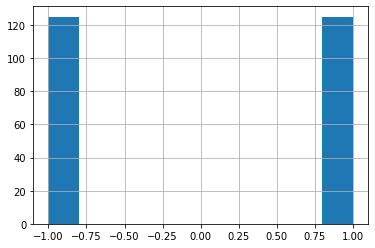

In [9]:
df['clase'].hist()

In [10]:
len(spam_words_list)

200

# Atribute Engineering

In [11]:
def document_features(document):
    document_words = set(document)
    features = {}
    features['longitud'] = len(document)
    #for word in top_words:
    for word in spam_words_list:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [12]:
fset = [(document_features(texto), clase) for texto, clase in zip(df['tokens'].values, df['clase'].values)]
random.shuffle(fset)
print(len(fset))
train, test = fset[:200], fset[100:]

250


# Model Training and Evaluation

In [13]:
classifier = nltk.NaiveBayesClassifier.train(train)

In [14]:
print(nltk.classify.accuracy(classifier, test))

0.9466666666666667
